ImportError: No module named colab

In [15]:
import os
#os.chdir("gdrive/My Drive/Colab Notebooks/Simple CNN Image Tutorial/")

#os.listdir('gdrive/My Drive/Colab Notebooks/single_prediction')

In [16]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

TRAIN_DIR = 'TrainData'


x_data=[]
y_data=[]

for img in tqdm(os.listdir(TRAIN_DIR)):
    #print(img)
    path = os.path.join(TRAIN_DIR,img)
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (28,28))
    x_data.append(image)
    y_data.append(img[0])
    #print(type(img))
    #plt.imshow(img, cmap='Greys')
    #print(img)

#plt.imshow(x_data[12], cmap='Greys')

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_data)
#print(integer_encoded)
# binary encode
#onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#target = onehot_encoder.fit_transform(integer_encoded)
target=integer_encoded
print(target)




100%|██████████| 7500/7500 [00:02<00:00, 3310.10it/s]

[7 8 0 ... 7 7 6]


In [17]:
output = []
for x in target:
    if x not in output:
        output.append(x)
print len(output)

24


In [18]:
from sklearn.model_selection import train_test_split
x=np.array(x_data)
y=np.array(target)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1)


In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

('x_train shape:', (6750, 28, 28, 1))
('Number of images in x_train', 6750)
('Number of images in x_test', 750)


In [20]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.8))
model.add(Dense(24,activation=tf.nn.softmax))

In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=Y_train, epochs=10)

Epoch 1/10
6750/6750 [==============================] - 5s 699us/step - loss: 1.9509 - acc: 0.4053
Epoch 2/10
6750/6750 [==============================] - 4s 635us/step - loss: 0.7983 - acc: 0.7397
Epoch 3/10
6750/6750 [==============================] - 4s 632us/step - loss: 0.5190 - acc: 0.8252
Epoch 4/10
6750/6750 [==============================] - 4s 612us/step - loss: 0.3666 - acc: 0.8745
Epoch 5/10
6750/6750 [==============================] - 5s 677us/step - loss: 0.3016 - acc: 0.8904
Epoch 6/10
6750/6750 [==============================] - 4s 637us/step - loss: 0.2590 - acc: 0.9107
Epoch 7/10
6750/6750 [==============================] - 4s 653us/step - loss: 0.2329 - acc: 0.9148
Epoch 8/10
6750/6750 [==============================] - 5s 678us/step - loss: 0.1959 - acc: 0.9277
Epoch 9/10
6750/6750 [==============================] - 6s 815us/step - loss: 0.1917 - acc: 0.9310
Epoch 10/10
6750/6750 [==============================] - 4s 637us/step - loss: 0.1719 - acc: 0.9382


In [24]:
model.evaluate(X_test, Y_test)

750/750 [==============================] - 0s 197us/step


[0.012518789534457028, 0.9946666666666667]

10


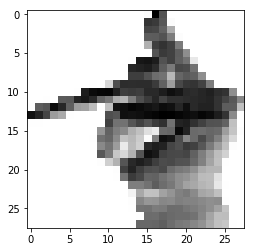

In [25]:
image_index = 2
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1,28, 28, 1))
print(pred.argmax())